In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Augment the data

In [3]:
train = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255)

Loading and augmentation of given data

In [4]:
A_train = train.flow_from_directory('/content/drive/MyDrive/Dataset/train', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')
A_test = test.flow_from_directory('/content/drive/MyDrive/Dataset/test', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [5]:
print(A_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


In [6]:
print(A_test.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


Import Keras library

In [7]:
model = Sequential()

Add 1st Convolution Layer and Pooling  layer

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Add 2nd Convolution Layer and Pooling layer

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Add Flatten layer

In [10]:
model.add(Flatten())

Add dense layers

In [11]:
model.add(Dense(units=512,activation='relu'))

In [12]:
model.add(Dense(units=6,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

Compile the model

In [14]:
model.compile(metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam')

Train the model

In [15]:
model.fit(A_train,steps_per_epoch = 594/3,epochs=25,validation_data=A_test,validation_steps=len(A_test))

Epoch 1/25
198/198 [==============================] - 177s 888ms/step - loss: 1.3452 - accuracy: 0.4646 - val_loss: 0.5697 - val_accuracy: 0.7667
Epoch 2/25
198/198 [==============================] - 6s 31ms/step - loss: 0.6095 - accuracy: 0.7576 - val_loss: 0.4496 - val_accuracy: 0.9000
Epoch 3/25
198/198 [==============================] - 6s 31ms/step - loss: 0.3980 - accuracy: 0.8367 - val_loss: 0.4156 - val_accuracy: 0.9000
Epoch 4/25
198/198 [==============================] - 6s 31ms/step - loss: 0.2943 - accuracy: 0.8973 - val_loss: 0.3322 - val_accuracy: 0.9333
Epoch 5/25
198/198 [==============================] - 6s 31ms/step - loss: 0.2207 - accuracy: 0.9209 - val_loss: 0.2676 - val_accuracy: 0.9333
Epoch 6/25
198/198 [==============================] - 6s 31ms/step - loss: 0.1487 - accuracy: 0.9512 - val_loss: 0.3064 - val_accuracy: 0.9333
Epoch 7/25
198/198 [==============================] - 6s 32ms/step - loss: 0.0904 - accuracy: 0.9663 - val_loss: 0.3381 - val_accuracy: 0.9

Save the model

In [16]:
model.save('gesture.h5')

In [17]:
json_model = model.to_json()
with open("model-gesture.json","w") as json_file:
  json_file.write(json_model)

Test the model

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
model = load_model('gesture.h5')
img_path="/content/drive/MyDrive/test_image.jpg"

Populating the interactive namespace from numpy and matplotlib


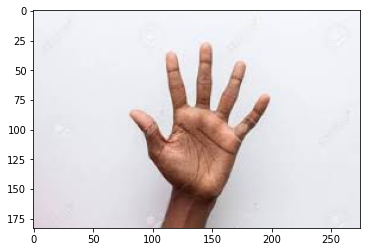

In [27]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [28]:
imgload = image.load_img(img_path,color_mode='grayscale',target_size=(64,64))
res = image.img_to_array(imgload)
res.shape

(64, 64, 1)

In [29]:
type(res)

numpy.ndarray

In [30]:
res = np.expand_dims(res,axis=0)

In [34]:
res.shape

(1, 64, 64, 1)